In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc

In [2]:
#Python 3.12.2
print(np.__version__)

1.26.4


# 1 Second-order optimization method

## 1.1 Newton's method

### Implementation 1.1

In [3]:
def Newton(w, f, nabla_f, nabla2_f, max_iter=10):
    for k in range(max_iter):
        inv_nabla2_f = np.linalg.inv(nabla2_f(w))
        w = w - (inv_nabla2_f @ nabla_f(w))
    return w, f(w)

### Question 1
a)

\begin{align}
    minimize_{\mathbf{w} \in \mathbb{R}^3} \ q(\mathbf{w}) := 2(w_1 + w_2 + w_3 - 3)^2 + (w_1 - w_2)^2 + (w_2 - w_3)^2
\end{align}

First let's calculate the derivate of q along w : <br>

\begin{align}
    \nabla_{w_1}q(w) &= 4(w_1 + w_2 + w_3 -3)\times 1 + 2(w_1 - w_2)\times 1 + 0 \\
    &= 6w_1 + 2w_2 + 4w_3 -12 \\

    \nabla_{w_2}q(w) &= ... \\
    &= 2w_1 + 8w_2 + 2w_3 -12 \\

    \nabla_{w_3}q(w) &= ... \\
    &= 4w_1 + 2w_2 + 6w_3 -12
\end{align}

And the Hessian matrix :

\begin{align}
    \nabla^2 q(w) &= \begin{bmatrix} 6 & 2 & 4 \\ 2 & 8 & 2 \\ 4 & 2 & 6 \end{bmatrix} \\
    
    [\nabla^2 q(w)]^{-1} &= \frac{1}{36} \begin{bmatrix} 11 & -1 & -7 \\ -1 & 5 & -1 \\ -7 & -1 & 11 \end{bmatrix}
\end{align}

Let $w^0 = \begin{bmatrix} 1 \\ 0 \\ -1 \end{bmatrix}$ be our initial point, let's write down the first iteration of Newton's method :

\begin{align}
    w^1 &= w^0 - [\nabla^2 q(w^0)]^{-1} \nabla q(w^0) \\

    &= \begin{bmatrix} 1 \\ 0 \\ -1 \end{bmatrix} - \frac{1}{36} \begin{bmatrix} 11 & -1 & -7 \\ -1 & 5 & -1 \\ -7 & -1 & 11 \end{bmatrix}
    \begin{bmatrix} -10 \\ -12 \\ -14 \end{bmatrix} \\

    &= \begin{bmatrix} 1 \\ 0 \\ -1 \end{bmatrix} -  \frac{1}{36} \begin{bmatrix} 0 \\ -36 \\ -72 \end{bmatrix} \\
    
    &= \begin{bmatrix} 1 \\ 1 \\ 1 \end{bmatrix} = w^{*}
\end{align}

Newton's method indeed converges to the solution in one iteration

### Question 1
b)

In [3]:
from obj_functions import QuadraticFunction

In [4]:
q = QuadraticFunction()

Starting points :

In [6]:
origin = np.array([0,0,0]).reshape(3,1)
some_w = np.random.rand(3,1)*(-10)
some_other_w = np.random.rand(3,1)*1000000
print(origin)
print(some_w)
print(some_other_w)

[[0]
 [0]
 [0]]
[[-6.8921478 ]
 [-3.2564346 ]
 [-3.35556914]]
[[ 91487.20967891]
 [504979.88194594]
 [573066.48864024]]


Running the algorithm :

In [7]:
for starting_point in [origin, some_w, some_other_w]:
    print(Newton(starting_point, q, q.nabla, q.nabla2, max_iter=1))

(array([[1.],
       [1.],
       [1.]]), 6.409494854920721e-31)
(array([[1.],
       [1.],
       [1.]]), 4.9106591350007985e-29)
(array([[1.],
       [1.],
       [1.]]), 1.5246593050577406e-19)


We indeed observe convergence within a single iteration with any starting point, no matter how far it may start from the solution

### Question 2

We now consider the Rosenbrock function : <br>
\begin{align}
    minimize_{w \in \mathbb{R}^3}  \ r(w) := 100(w_2 - w_1^2)^2 + (1-w_1)^2
\end{align}
#### a) Implementation

In [5]:
from obj_functions import RosenBrock

In [6]:
r = RosenBrock()

In [10]:
from algorithms import Newton2

Starting points :

In [11]:
w01 = np.array([[-1.2],
                [1.]])
w02 = np.array([[0],
                [1/200 + 1e-12]])
print(w01, "\n", w02)

[[-1.2]
 [ 1. ]] 
 [[0.   ]
 [0.005]]


Running Newton's algorithm for w01 :

Iteration : 1
Iteration : 2
Iteration : 3
Iteration : 4
Iteration : 5
Iteration : 6
Iteration : 7
Iteration : 8


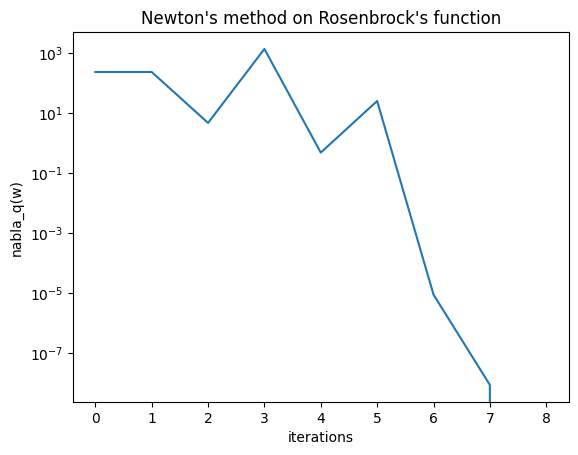

[232.86768775422658, 232.86768775422658, 4.639426214066988, 1370.7898494462647, 0.4731103791063378, 25.027445596718806, 8.60863351986397e-06, 8.285692882136158e-09, 0.0]


In [12]:
MAX_ITER = 10
w, grad_logs = Newton2(w01, RosenBrock, MAX_ITER)
plt.plot(grad_logs)
plt.title("Newton's method on Rosenbrock's function")
plt.xlabel('iterations')
plt.ylabel("nabla_q(w)")
plt.yscale('log')
plt.show()
print(grad_logs)

w01 does converges within 8 iterations, but the algorithm is unstable as it reached 1e3 gradient norm

Let's run it on w02 :

In [16]:
MAX_ITER = 10
w, grad_logs = Newton2(w02, RosenBrock, MAX_ITER)

Iteration : 1
Iteration : 2
Iteration : 3
Iteration : 4
Iteration : 5


LinAlgError: Singular matrix

It raises a singular matrix error meaning the hessian matrix is not inversible at iteration 5. <br>
Let's take a look at what the values were before the error, by stopping at 4 iterations :

Iteration : 1
Iteration : 2
Iteration : 3
Iteration : 4


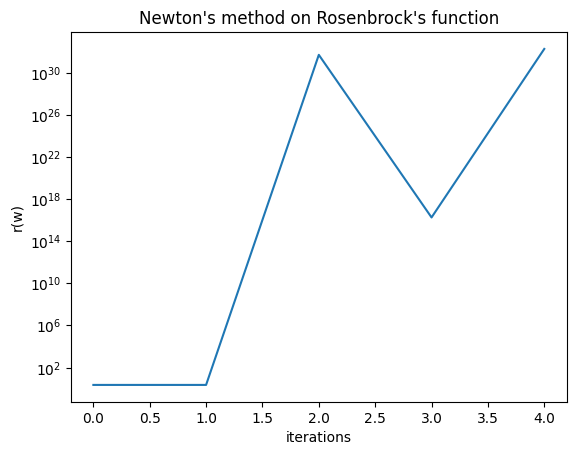

[2.2360679775892325, 2.2360679775892325, 4.999998758894642e+31, 1.801438850948281e+16, 1.8219851271675228e+32]


In [17]:
MAX_ITER = 4
w, grad_logs = Newton2(w02, RosenBrock, MAX_ITER)
plt.plot(grad_logs)
plt.title("Newton's method on Rosenbrock's function")
plt.xlabel('iterations')
plt.ylabel("r(w)")
plt.yscale('log')
plt.show()
print(grad_logs)

The algorithm diverges, the gradient norm goes to infinity before the Hessian matrix becomes a singular matrix

#### b)

Let's run the algorithm from another starting point w03 that's very very close to w02 (we only moved the second coordinate by 1e-12):

In [18]:
w03 = np.array([[0],
                [5e-3]])
print(w03)

[[0.   ]
 [0.005]]


In [19]:
w, grad_logs = Newton2(w03, RosenBrock, max_iter=1)

Iteration : 1


LinAlgError: Singular matrix

In [20]:
print("Hessian matrix evaluated at w02 :\n", r.nabla2(w02))
print("Hessian matrix evaluated at w03 :\n", r.nabla2(w03))

Hessian matrix evaluated at w02 :
 [[-4.00000033e-10 -0.00000000e+00]
 [-0.00000000e+00  2.00000000e+02]]
Hessian matrix evaluated at w03 :
 [[  0.  -0.]
 [ -0. 200.]]


It can not even run one iteration because the Hessian matrix is clearly not inversible. <br>
This goes to show how Newton's method is local in nature : <br>
- Depending on the starting point, you can sometimes converge sometimes not
- Sometimes you can not even run one iteration
- Two close starting points, do not necessarily have the same convergence


To better illustrate the local property of this method, let's run it on every points in a grid and compare their convergence f(w) values :

In [21]:
# Redefine the Newton algorithm, if at any time the hessian matrix becomes a singular matrix, then return restriction_bound
def Newton_restricted(w, f, nabla_f, nabla2_f, max_iter=10, epsilon=1e-10, restriction_bound=10):
    iter=0
    try :
        while(iter<max_iter and np.linalg.norm(nabla_f(w))>epsilon):
            iter+=1
            inv_nabla2_f = np.linalg.inv(nabla2_f(w))
            w = w - (inv_nabla2_f @ nabla_f(w))
        #If overflow then return restriction_bound
        return min(restriction_bound, f(w))
    except :
        #If singular matrix then return restriction_bound
        return restriction_bound

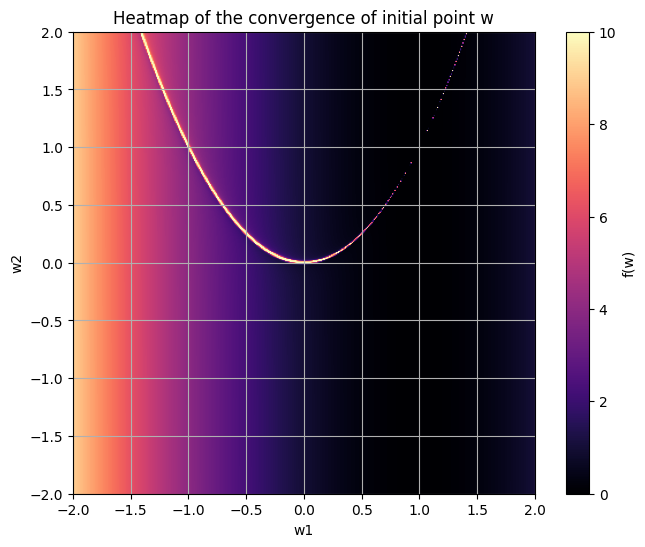

In [22]:
def hmap_grid_Newton_restricted(w_min, w_max, delta, max_iter, restriction_bound) :  
    # Defining the grid
    grid_length = int((w_max-w_min)/delta) + 1

    # Running Newton_restricted on every point of the grid
    convergence_result = []
    for w2 in np.arange(w_min, w_max+delta, delta):
        for w1 in np.arange(w_min, w_max+delta, delta):
            convergence_result.append(
                Newton_restricted(np.array([[w1],[w2]]), r, r.nabla, r.nabla2, max_iter=max_iter, restriction_bound=restriction_bound)
            )
    convergence_result = np.array(convergence_result).reshape(grid_length, grid_length)

    # Heatmap plot
    plt.figure(figsize=(8, 6))
    plt.imshow(convergence_result, extent=[w_min, w_max, w_min, w_max], origin='lower', cmap='magma')
    plt.colorbar(label='f(w)')
    plt.xlabel('w1')
    plt.ylabel('w2')
    plt.grid(True)
    plt.title('Heatmap of the convergence of initial point w')
    plt.show()

hmap_grid_Newton_restricted(-2, 2, 0.01, 1, 10)

10 being the restriction bound when the algorithm does not converge or raises an error. <br>
Each starting point had a maximum of 1 iteration

As shown in the figure above, the algorithm converges when starting close to the actual solution : (1,1) <br>
If it starts with w1 = -2, for any w2, it will not converge in one iteration <br>
There also seems to be a parabolic curve for which the algorithm does not converge

Let's try with more iterations

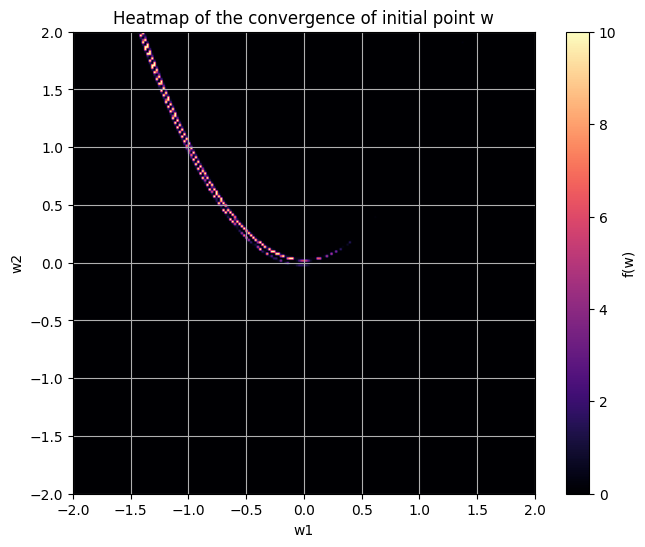

In [23]:
hmap_grid_Newton_restricted(w_min=-2, w_max=2, delta=0.02, max_iter=5, restriction_bound=10)

With 5 iterations the algorithm almost always converge. <br>
The only starting points that do not converge are the ones on that half of a parabolic curve, showing the local property of this method. <br>
Note : w03 is on that curve

In [21]:
gc.collect()

10729

## 1.2 A globally convergent version of Newton's method

### Implementation 1.2

In [22]:
from algorithms import GlobalNewton, ArmijoLineSearch

### Question 3

In [23]:
w01 = np.array([[-1.2],
                [1.]])
w02 = np.array([[0],
                [(1/200) + 1e-12]])
print(w01, "\n", w02)

[[-1.2]
 [ 1. ]] 
 [[0.   ]
 [0.005]]


Iteration : 1
Iteration : 2
Iteration : 3
Iteration : 4
Iteration : 5
Iteration : 6
Iteration : 7
Iteration : 8


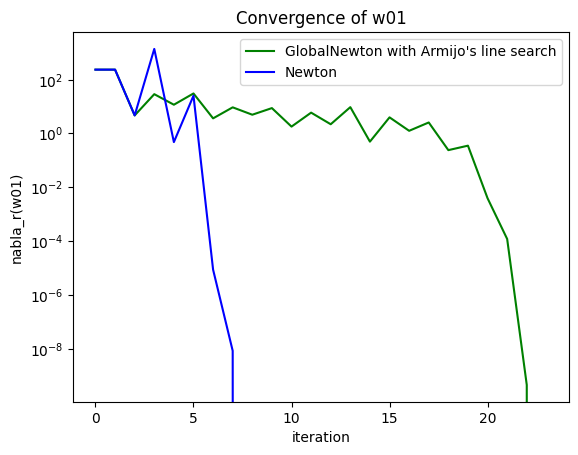

In [24]:
w, grad_logs = GlobalNewton(w01, RosenBrock, max_iter=100, tolerance=1e-10, c=1e-4, theta=0.5, initial_alpha=1)
w_, grad_logs_ = Newton2(w01, RosenBrock, max_iter=100)
plt.plot(grad_logs, color='green', label="GlobalNewton with Armijo's line search")
plt.plot(grad_logs_, color='blue', label='Newton')
plt.legend()
plt.ylabel("nabla_r(w01)")
plt.xlabel("iteration")
plt.title("Convergence of w01")
plt.yscale('log')
plt.show()

For w01, the normal Newton converges faster, however it does reach a high value, showing its instability <br>
The global Newton with line search method is slower in terms of iterations, it converges within 20 iterations, but it seems more stable.

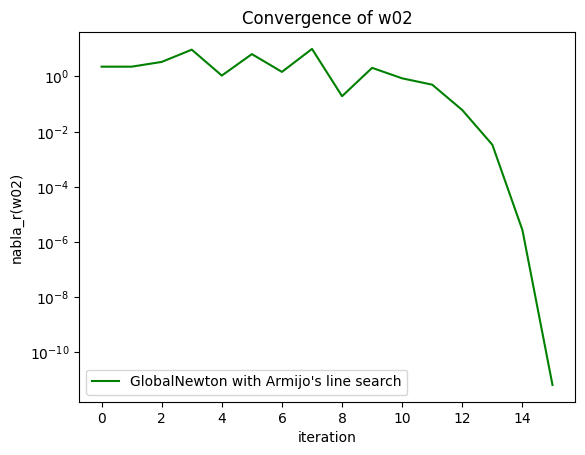

In [25]:
w, grad_logs = GlobalNewton(w02, RosenBrock, max_iter=100, tolerance=1e-10, c=1e-4, theta=0.5, initial_alpha=1)
plt.plot(grad_logs, color='green', label="GlobalNewton with Armijo's line search")
plt.legend()
plt.ylabel("nabla_r(w02)")
plt.xlabel("iteration")
plt.title("Convergence of w02")
plt.yscale('log')
plt.show()

For w02, unlike the basic method, the global method does converge.

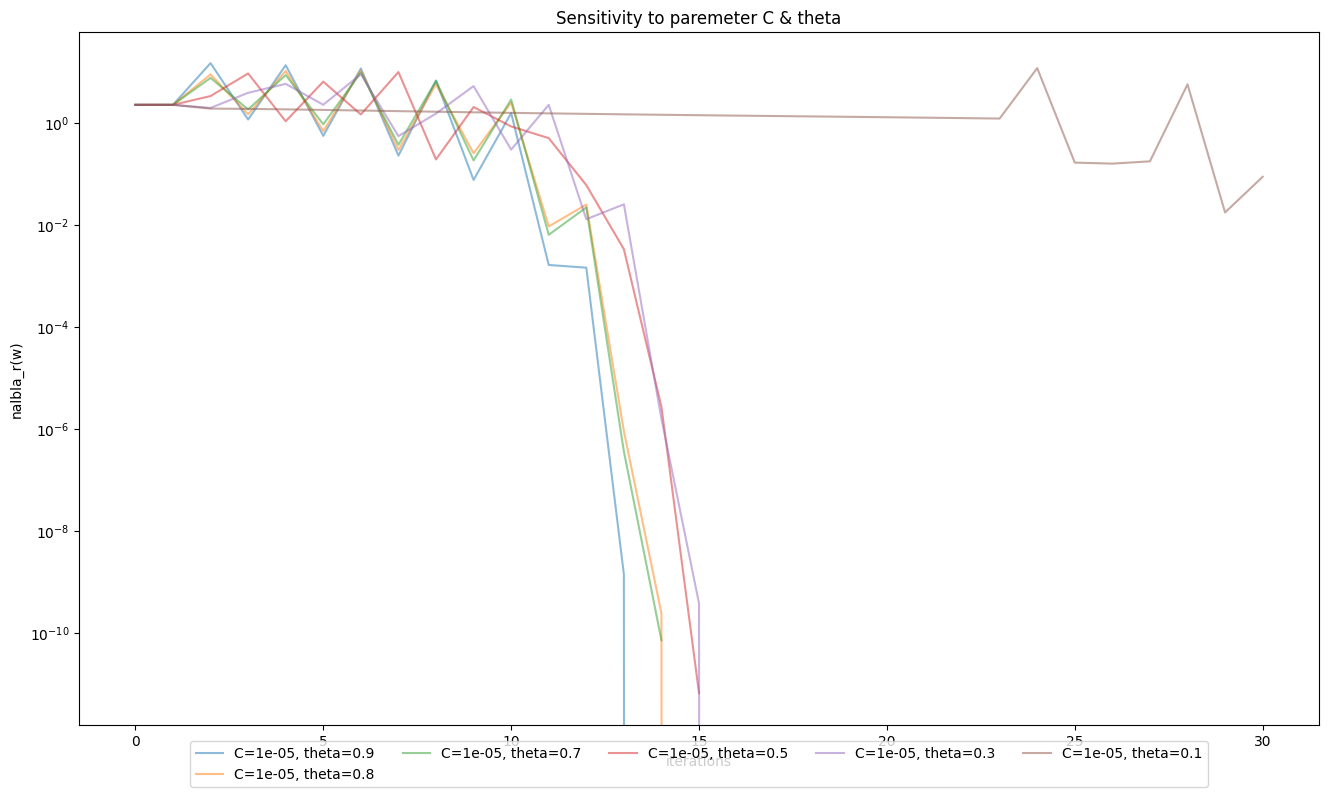

In [30]:
# Armijo hyper parameters 

# Try this combination to see the impact of C :
# Cs = np.logspace(-5, -1, 5)
# thetas = [0.9]

# Try this combination to see the impact of theta :
Cs = [1e-5]
thetas = [0.9, 0.8, 0.7, 0.5, 0.3, 0.1]

# initial point
initial_w = w03

plt.figure(figsize=(16,9))
for c in Cs :
    for theta in thetas :
        w, grad_logs = GlobalNewton(initial_w, RosenBrock, max_iter=30, c=c, theta=theta)
        plt.plot(grad_logs, label=f"C={c}, theta={theta}", alpha=0.5)
plt.legend(
    loc='lower center',
    ncol=5,
    bbox_to_anchor=(0.5, -0.1),
    fancybox=True
)
plt.ylabel("nalbla_r(w)")
plt.xlabel("iterations")
plt.yscale('log')
plt.title("Sensitivity to paremeter C & theta")
plt.show()

The method doesn't seem very sensitive to hyperparameters. <br>
Specifically for the values of C in [1e-5, 1e-4, ..., 0.1], it always converge with the same amount of iterations, and their convergence curves don't really seem different. <br>
However it does seem a little sensitive to the value of theta, for w03, it converges within 12-15 iterations for high values of theta. But for theta = 0.1, the convergence takes up to 30 iterations.

In [26]:
try :
    del w, grad_logs, grad_logs_
except :
    pass
gc.collect()

11286

## 1.3 Quasi-Newton method and BFGS

### Implementation 1.3

In [7]:
from algorithms import Newton_LineSearch, QuasiNewton_BFGS, ArmijoLineSearch, run_algorithm, get_H
from obj_functions import RosenBrock, QuadraticFunction

### Question 5

Compare the quasi-Newton method from Implementation 1.3 and the line-search Newton method
from Implementation 1.1 on problems (3) and (4). Use the same starting points and the same values for c
and θ in the comparison. Illustrate the comparison in terms of :
- Iterations
- Gradient and Hessian evaluations, assuming the cost of a Hessian matrix is d times that of a gradient vector
- Function evaluations.

**First : Problem (3) Quadratic function**

Starting point for the comparison :

In [8]:
N = 100
some_ws = np.random.rand(N,3,1)

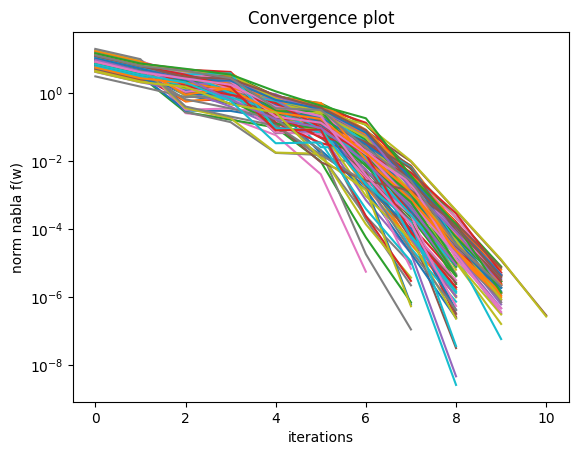

Average w reached :
 [[0.9999999 ]
 [1.00000007]
 [1.00000008]]
Average gradient norm reached : 2.870012790687235e-06
Average iterations : 8.41
Average function evaluations : 21.36
Average gradient evaluations : 9.41
Successful convergence : 100 / 100
Early exits : 0


In [9]:
MAX_ITER=1000

run_algorithm(
    initial_ws=some_ws,
    algorithm_fn=QuasiNewton_BFGS,
    fn_class=QuadraticFunction,
    use_line_search=True,
    max_iter=MAX_ITER,
    tolerance=1e-5,
    c=0.0001,
    theta=0.5
)

The quasi-Newton method with BFGS takes about 8 iterations to converge (with tolerance error of 1e-5) depending on the value of theta. <br>
We see that the number of gradient evaluations is always the number of iterations+1 <br>
With w = random point in (0,1), theta = 0.5 and c=0.0001, the method evaluates the function about 2 times per iteration.

**Comparison with Newton Line search**

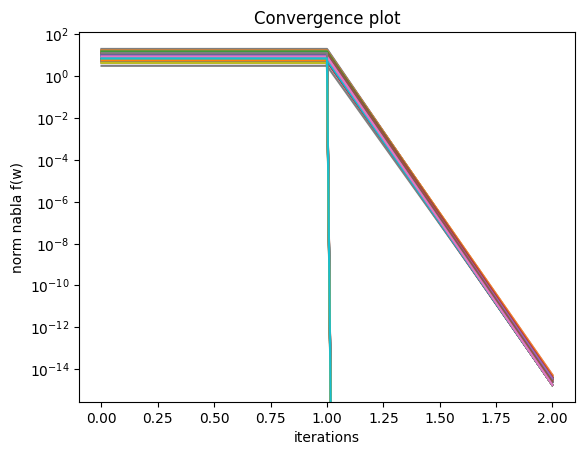

Average w reached :
 [[1.]
 [1.]
 [1.]]
Average gradient norm reached : 1.9716957456563363e-15
Average iterations : 2.0
Average function evaluations : 4.62
Average gradient evaluations : 9.0
Successful convergence : 100 / 100
Early exits : 0


In [10]:
MAX_ITER=1000

run_algorithm(
    initial_ws=some_ws,
    algorithm_fn=Newton_LineSearch,
    fn_class=QuadraticFunction,
    max_iter=MAX_ITER,
    tolerance=1e-5,
    c=0.0001,
    theta=0.5
)

Unsurprisingly the basic Newton method converges on strongly quadratic convex functions in 1 or 2 iterations, it doesn't really need the Armijo Line-search in this particular case, making it very cheap in terms of func/grad evaluations. <br>
We do see that the nb of gradient evaluations per iteration for the basic Newton method is higher than the quasi-Newton method <br>
Even though basic Newton only needed 2 iterations, it evaluated the same amount of times the gradient as BFGS

**Let's try this on problem (4) where the objective function isn't strongly convex quadratic**

In [11]:
#Starting points
np.random.seed(3)
N=50
some_ws = np.random.rand(N,2,1)

Run it on N random uniform (0,1) ws

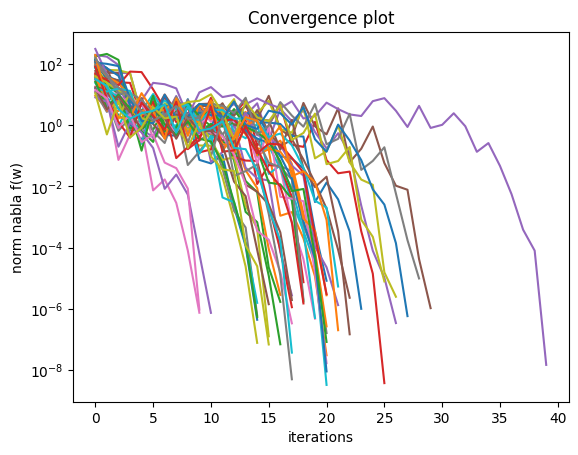

Average w reached :
 [[0.99999994]
 [0.99999987]]
Average gradient norm reached : 1.5917879276390356e-06
Average iterations : 19.16
Average function evaluations : 51.5
Average gradient evaluations : 20.16
Successful convergence : 50 / 50
Early exits : 0


In [12]:
MAX_ITER=1000

run_algorithm(
    initial_ws=some_ws,
    algorithm_fn=QuasiNewton_BFGS,
    fn_class=RosenBrock,
    use_line_search=True,
    max_iter=MAX_ITER,
    tolerance=1e-5,
    c=0.0001,
    theta=0.5
)

Good results, 3 func evals/iter, 1 grad eval/iter, 21 iterations on average

**Let's see how Newton line search does**

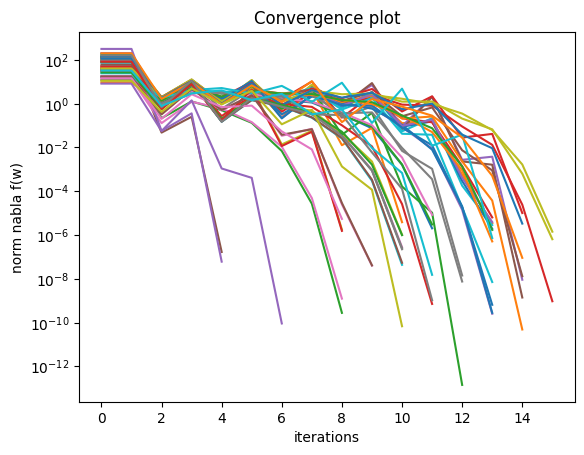

Average w reached :
 [[1.]
 [1.]]
Average gradient norm reached : 1.3141554411687841e-06
Average iterations : 11.26
Average function evaluations : 24.8
Average gradient evaluations : 34.78
Successful convergence : 50 / 50
Early exits : 0


In [13]:
MAX_ITER=1000

run_algorithm(
    initial_ws=some_ws,
    algorithm_fn=Newton_LineSearch,
    fn_class=RosenBrock,
    max_iter=MAX_ITER,
    tolerance=1e-5,
    c=0.0001,
    theta=0.5
)

Even though the basic Newton method doesn't have a guarantee of converging globally on a non-convex problem, here it still does most of the time. If you changed the seed to 2 when generating the starting point, you would see points that do not converge. <br>

**Comparison between Newton Line search and BFGS:** <br>
Even though Newton line search converges faster in terms of iterations, BFGS has less gradient evaluations. <br>
BFGS has ~25 more function evaluations but ~15 less gradient evaluations. <br>
Since d=2 here, one could argue that 1 gradient evaluation ~ d*1 function evaluations, so 15 gradient evaluations less would be equivalent to 30 functions evaluations. <br> So BFGS is better here

 (assuming 1 hessian eval ~ d gradient evals, but since the Hessian matrix is symmetric it should d/2 (I think) gradient evaluations, therefore Newton in reality does not really do 34.78 gradient evaluations)

**Let's try both methods on the gaussians N(0,99²) starting points to challenge them :**

In [14]:
# Gaussian(0,99²)
np.random.seed(3)
some_other_ws = np.random.randn(N,2,1)*99

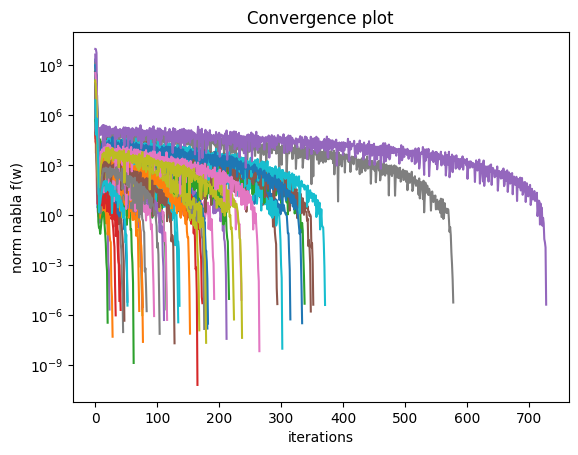

Average w reached :
 [[1.00000009]
 [1.00000019]]
Average gradient norm reached : 2.159577887981916e-06
Average iterations : 175.2
Average function evaluations : 445.52
Average gradient evaluations : 176.2
Successful convergence : 50 / 50
Early exits : 0


In [15]:
MAX_ITER=1000

run_algorithm(
    initial_ws=some_other_ws,
    algorithm_fn=QuasiNewton_BFGS,
    fn_class=RosenBrock,
    use_line_search=True,
    max_iter=MAX_ITER,
    tolerance=1e-5,
    c=0.0001,
    theta=0.5
)

When starting at random points with high variance, the Quasi-Newton BFGS converges successfully

**With Newton Line search :**

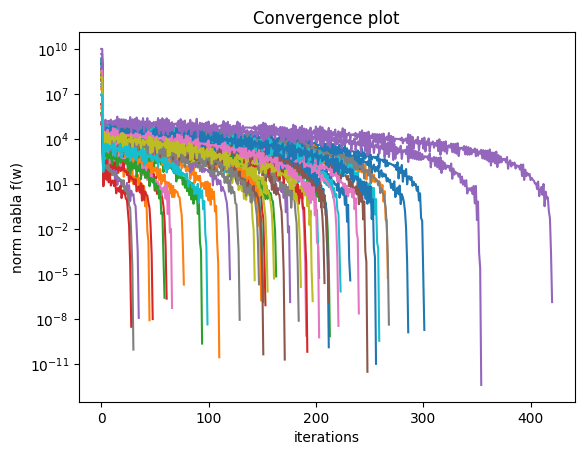

Average w reached :
 [[1.]
 [1.]]
Average gradient norm reached : 8.849291398250389e-07
Average iterations : 172.94
Average function evaluations : 421.48
Average gradient evaluations : 519.82
Successful convergence : 50 / 50
Early exits : 0


In [16]:
MAX_ITER=1000

run_algorithm(
    initial_ws=some_other_ws,
    algorithm_fn=Newton_LineSearch,
    fn_class=RosenBrock,
    max_iter=MAX_ITER,
    tolerance=1e-5,
    c=0.0001,
    theta=0.5
)

The Newton method does surprisingly well

**Comparison : The number of iterations are equivalent here. BFGS is better in terms of func/grad evaluations per iteration. The clear winner here is BFGS it computes 3 times less gradients**

In [17]:
gc.collect()

34584

## 1.4 Limited memory BFGS

### Implementation 1.4

In [18]:
from collections import deque
#deque is a list-like container with fast appends and pops on either end

m = 5
a = deque([1,2,3,4,5], maxlen=m)
a.append(1)
print(a)

deque([2, 3, 4, 5, 1], maxlen=5)


In [19]:
from algorithms import get_limited_H, QuasiNewton_LBFGS

### Question 6

Run BFGS and three variants of L-BFGS respectively using m = 0, m = 1 and m = 5 on the
Rosenbrock function (4), and compare the results. What metric could show the computational interest of
limited memory quasi-Newton? Do you observe this improvement here?

When m = 0 then H = Id, and the algorithm becomes the basic gradient descent

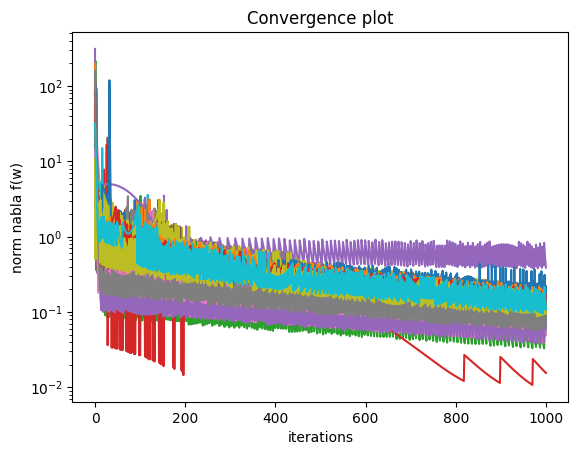

Average w reached :
 [[0.94709496]
 [0.90199255]]
Average gradient norm reached : 0.12900333061323174
Average iterations : 1000.0
Average function evaluations : 10556.5
Average gradient evaluations : 1001.0
Successful convergence : 0 / 50
Early exits : 0


In [20]:
# Setup
m = 0
N = 50
np.random.seed(3)
initial_ws = np.random.rand(N,2,1)
MAX_ITER = 1000

run_algorithm(
    initial_ws=initial_ws,
    algorithm_fn=QuasiNewton_LBFGS,
    fn_class=RosenBrock,
    m=m,
    use_line_search=True,
    max_iter=MAX_ITER,
    tolerance=1e-5,
    c=1e-4,
    theta=0.5,
)

The gradient descent is very slow, with a budget of 1000 iterations, there was 0 succesful convergence (with tolerance 1e-5) <br>
But the results were close to thev solution

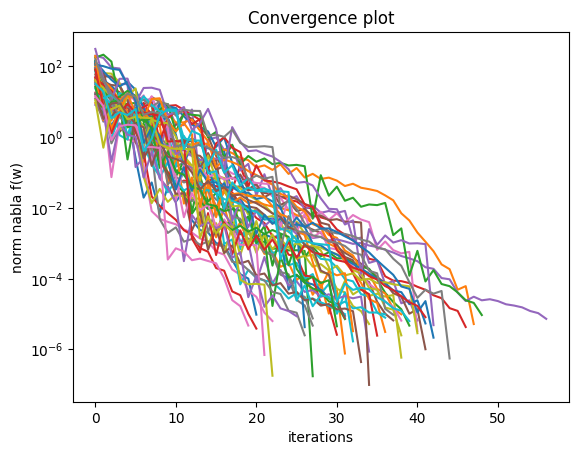

Average w reached :
 [[0.99999993]
 [0.99999986]]
Average gradient norm reached : 4.690660789752111e-06
Average iterations : 34.22
Average function evaluations : 315.4
Average gradient evaluations : 35.22
Successful convergence : 50 / 50
Early exits : 0


In [21]:
# Setup
m = 1

run_algorithm(
    initial_ws=initial_ws,
    algorithm_fn=QuasiNewton_LBFGS,
    fn_class=RosenBrock,
    m=m,
    use_line_search=True,
    max_iter=MAX_ITER,
    tolerance=1e-5,
    c=1e-4,
    theta=0.5,
)

For m=1, We see that the convergence is log linear in terms of iterations. <br>
This is much better than m=0 in terms of every criterion (iterations/evaluations). <br>
10 func evals/iter

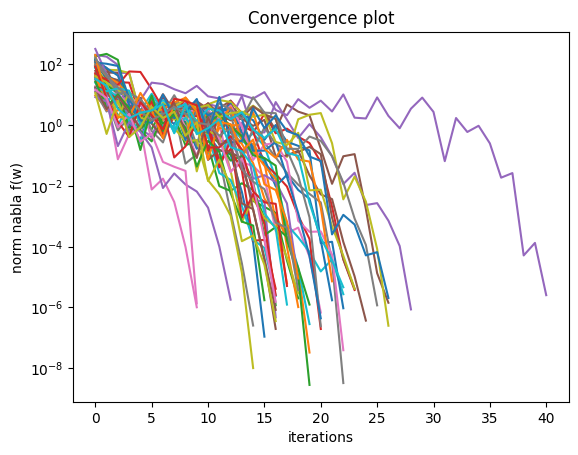

Average w reached :
 [[0.99999995]
 [0.9999999 ]]
Average gradient norm reached : 1.981809861384584e-06
Average iterations : 19.26
Average function evaluations : 56.0
Average gradient evaluations : 20.26
Successful convergence : 50 / 50
Early exits : 0


In [22]:
# Setup
m = 5

run_algorithm(
    initial_ws=initial_ws,
    algorithm_fn=QuasiNewton_LBFGS,
    fn_class=RosenBrock,
    m=m,
    use_line_search=True,
    max_iter=MAX_ITER,
    tolerance=1e-5,
    c=1e-4,
    theta=0.5,
)

with m=5, the algorithm is even faster with only 21 iterations on average, <br>
and only 3 function evaluations per iterations against 10 for m=1

The interest of the limited BFGS algorithm is that it doesn't hold in memory the D² float matrix H from the previous iteration <br>
To compute H, we only hold ~ 2 * m * D, (because v and s are vectors of size D and we keep the last m iterations history)

**Let's compare BFGS with L-BFGS with m=0, m=1, m=5**

In [23]:
np.random.seed(3)
initial_w = np.random.randn(2,1)

m=1 {'iterations': 38, 'function evaluations': 355, 'gradient evaluations': 39, 'successful': True, 'early exit': False}
m=2 {'iterations': 30, 'function evaluations': 149, 'gradient evaluations': 31, 'successful': True, 'early exit': False}
m=5 {'iterations': 33, 'function evaluations': 100, 'gradient evaluations': 34, 'successful': True, 'early exit': False}
m=10 {'iterations': 34, 'function evaluations': 96, 'gradient evaluations': 35, 'successful': True, 'early exit': False}
BFGS {'iterations': 38, 'function evaluations': 101, 'gradient evaluations': 39, 'successful': True, 'early exit': False}


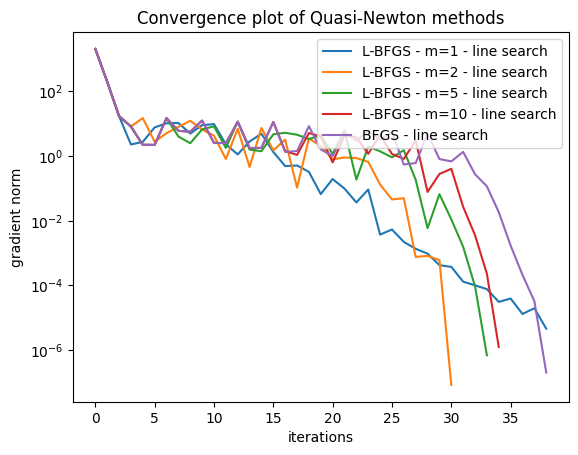

In [24]:
for m in [
    # 0, uncomment this line to try m=0, problem is it stretches out the x-axis
    1,
    2,
    5,
    10
    ]:
    w, grad_logs, logs = QuasiNewton_LBFGS(
        w=initial_w,
        function_class=RosenBrock,
        m=m,
        max_iter=1000,
        tolerance=1e-5,
        c=1e-4,
        theta=0.5
    )
    plt.plot(grad_logs, label=f"L-BFGS - m={m} - line search")
    print(f"m={m}", logs)

w, grad_logs, logs = QuasiNewton_BFGS(
    w=initial_w,
    function_class=RosenBrock,
    max_iter=1000,
    tolerance=1e-5,
    c=1e-4,
    theta=0.5
)
print("BFGS", logs)
plt.plot(grad_logs, label=f"BFGS - line search")
plt.legend(loc='upper right')
plt.ylabel("gradient norm")
plt.xlabel("iterations")
plt.title("Convergence plot of Quasi-Newton methods")
plt.yscale('log')

There seems to be a sweet spot in terms of the value of m. <br>
If m=0 or m=1, it's too slow, if m=5 or more, it's almost equivalent to normal BFGS. <br>
m=2 is faster in terms of iterations, but it costs ~2 more function evaluations per iter than m=5 and m=10. <br>
So m=2 is a tradeoff of computing more functions and less gradients, there is no clear winner here. <br>
<br>
One could argue that since d=3 here, so 1 grad eval ~ 3 func evals. Following this logic 20 func evals ~ 7 grad evals,
so m=5 and m=10 or BFGS are cheaper than m=2 for this specific example
